In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
df = pd.read_csv('dataset.csv')
df

,String,BWT_string
0,OTITBO,OTTB$IO
1,BNIUMP,P$NUBMI
2,AKSFAQZU,U$FSAAKZQ
3,GEDAKX,XDEG$AK
4,BJFVWZA,AZ$JBFVW
...,...,...
99995,PZEKZJA,AJZZE$PK
99996,EWWWRCLH,HR$LCWWWE
99997,ZSDPDT,TSPDZD$
99998,ZBRBBVIE,ERZBIVBB$


In [3]:
X = df['String']
y = df['BWT_string']

In [4]:
vocab_size = 10000
encoded_X = [ one_hot(d, vocab_size) for d in X]
encoded_y = [ one_hot(d, vocab_size) for d in y]

In [5]:
embedding_length = 5
max_len = 5
padded_X = pad_sequences(encoded_X, truncating='post', padding='post', maxlen=max_len)
padded_y = pad_sequences(encoded_y, truncating='post', padding='post', maxlen=max_len)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(padded_X, padded_y, test_size = 0.2, random_state =4)

In [7]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_length, input_length=max_len))

model.add(LSTM((1000),batch_input_shape=(1000, 100000, 5), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

#model.add(LSTM((5), activation='softmax', return_sequences=False))
#Adding the output layer
model.add(Dense(5, activation='softmax'))

model.compile(loss='mean_absolute_error',
#              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6),
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

#output = model.predict(X_train)
#print(output.shape)
#print(output)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 5)              50000     
                                                                 
 lstm (LSTM)                 (None, 5, 1000)           4024000   
                                                                 
 dropout (Dropout)           (None, 5, 1000)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               440400    
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
2500/2500 [==============================] - 302s 119ms/step - loss: 1899.0736 - accuracy: 0.5729 - val_loss: 1901.9132 - val_accuracy: 0.5771
Epoch 2/20
2500/2500 [==============================] - 265s 106ms/step - loss: 1899.0704 - accuracy: 0.5733 - val_loss: 1901.9132 - val_accuracy: 0.5771
Epoch 3/20
2500/2500 [==============================] - 241s 97ms/step - loss: 1899.0698 - accuracy: 0.5733 - val_loss: 1901.9132 - val_accuracy: 0.5771
Epoch 4/20
2500/2500 [==============================] - 216s 87ms/step - loss: 1899.0695 - accuracy: 0.5733 - val_loss: 1901.9132 - val_accuracy: 0.5771
Epoch 5/20
2500/2500 [==============================] - 216s 86ms/step - loss: 1899.0674 - accuracy: 0.5733 - val_loss: 1901.9132 - val_accuracy: 0.5771
Epoch 6/20
2500/2500 [==============================] - 215s 86ms/step - loss: 1899.0699 - accuracy: 0.5733 - val_loss: 1901.9132 - val_accuracy: 0.5771
Epoch 7/20
2500/2500 [==============================] - 220s 88ms/step - loss: 1

In [12]:
results = model.predict(X_test)
results

625/625 [==============================] - 16s 26ms/step


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

625/625 [==============================] - 16s 26ms/step - loss: 1901.9132 - accuracy: 0.5771
Test Loss: 1901.9132080078125
Test Accuracy: 0.5770999789237976


<function matplotlib.pyplot.show(close=None, block=None)>

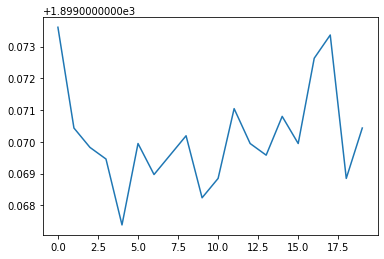

In [14]:
plt.plot(history.history['loss'])
plt.show